<a href="https://colab.research.google.com/github/deltorobarba/chemistry/blob/main/molecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automating Computational Chemistry**

In [48]:
!pip install pyscf matplotlib -q
from pyscf import gto, scf, dft
import matplotlib.pyplot as plt

In [42]:
# Define HF-SCF method
def run_hf_scf(atom_str, xc_functional='b3lyp', basis_set='cc-pvdz'):
    mol = gto.M(
        atom=atom_str,
        basis=basis_set
    )

    mf = scf.RHF(mol)

    conv_data = []

    def callback(envs):
        conv_data.append(envs['e_tot'])

    mf.callback = callback

    energy = mf.kernel()

    energies = conv_data
    iterations = range(1, len(energies) + 1)

    plt.plot(iterations, energies, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Total Energy (Hartree)')
    plt.title(f'HF-SCF Convergence ({xc_functional} functional, {basis_set} basis)')
    plt.grid(True)
    plt.show()

    return energy

In [43]:
# Define DFT-SCF method
def run_dft_scf(atom_str, xc_functional='b3lyp', basis_set='cc-pvdz'):
    # Step 1: Define molecule using provided atom positions and basis set
    mol = gto.M(
        atom=atom_str,
        basis=basis_set
    )

    # Step 2: Perform a DFT calculation with the specified functional
    mf = dft.RKS(mol)
    mf.xc = xc_functional

    # Store convergence data
    conv_data = []

    # Callback function to collect convergence information
    def callback(envs):
        conv_data.append(envs['e_tot'])

    # Set the callback to track SCF convergence
    mf.callback = callback

    # Perform the DFT calculation and get the total energy
    energy = mf.kernel()

    # Extract energy values and iteration numbers
    energies = conv_data
    iterations = range(1, len(energies) + 1)

    # Plot convergence
    plt.plot(iterations, energies, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Total Energy (Hartree)')
    plt.title(f'DFT-SCF Convergence ({xc_functional} functional, {basis_set} basis)')
    plt.grid(True)
    plt.show()

    return energy

In [52]:
# Define code for iterating through multiple molecules and multiple ground state calculaton methods
def calculate_multiple_molecules(molecule_data):
    results = {}

    for mol_info in molecule_data:
        print(f"Calculating for {mol_info['name']}...")
        energy = run_dft_scf(mol_info['atom_str'], mol_info['xc_functional'], mol_info['basis_set'])
        energy = run_hf_scf(mol_info['atom_str'], mol_info['xc_functional'], mol_info['basis_set'])
        results[mol_info['name']] = energy
        print(f"Total Energy for {mol_info['name']}: {energy} Hartree\n")

    return results

In [53]:
# Define molecular data for different molecules (water, benzene, and ammonia)
molecule_data = [
    {
        'name': 'Water (H2O)',
        'atom_str': '''
            O  0.000000  0.000000  0.000000
            H  0.000000  0.757000  0.586000
            H  0.000000 -0.757000  0.586000
        ''',
        'xc_functional': 'b3lyp',
        'basis_set': 'cc-pvdz'
    },
    {
        'name': 'Benzene (C6H6)',
        'atom_str': '''
            C   0.0000   1.4027   0.0000
            C  -1.2148   0.7014   0.0000
            C  -1.2148  -0.7014   0.0000
            C   0.0000  -1.4027   0.0000
            C   1.2148  -0.7014   0.0000
            C   1.2148   0.7014   0.0000
            H   0.0000   2.4900   0.0000
            H  -2.1567   1.2450   0.0000
            H  -2.1567  -1.2450   0.0000
            H   0.0000  -2.4900   0.0000
            H   2.1567  -1.2450   0.0000
            H   2.1567   1.2450   0.0000
        ''',
        'xc_functional': 'b3lyp',
        'basis_set': 'cc-pvdz'
    },
    {
        'name': 'Ammonia (NH3)',
        'atom_str': '''
            N  0.000000  0.000000  0.000000
            H  0.000000  0.000000  0.950000
            H  0.000000  0.824000 -0.475000
            H  0.000000 -0.824000 -0.475000
        ''',
        'xc_functional': 'b3lyp',
        'basis_set': 'cc-pvdz'
    }
]

Calculating for Water (H2O)...
converged SCF energy = -76.4203489203945


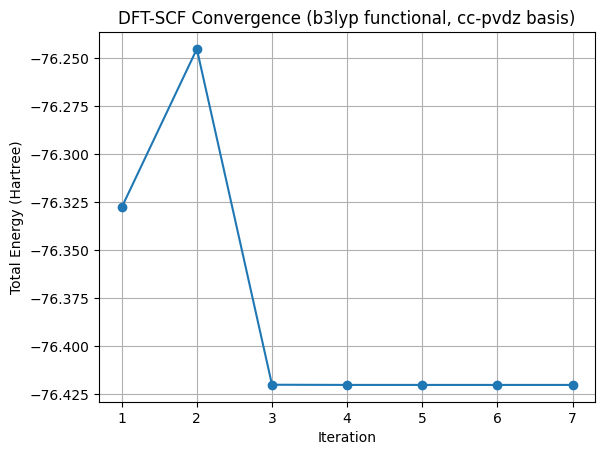

converged SCF energy = -76.0267936449739


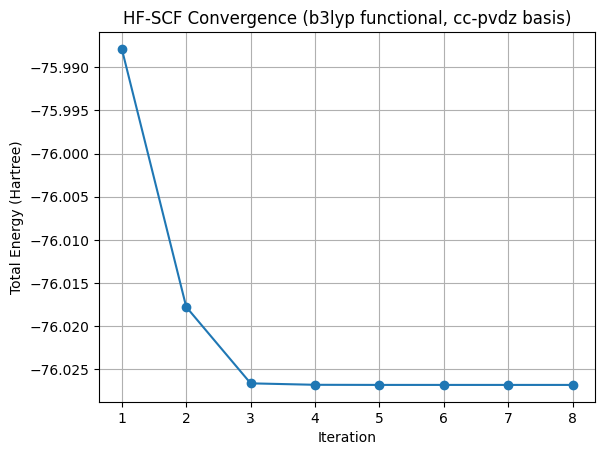

Total Energy for Water (H2O): -76.02679364497394 Hartree

Calculating for Benzene (C6H6)...
converged SCF energy = -232.262761777775


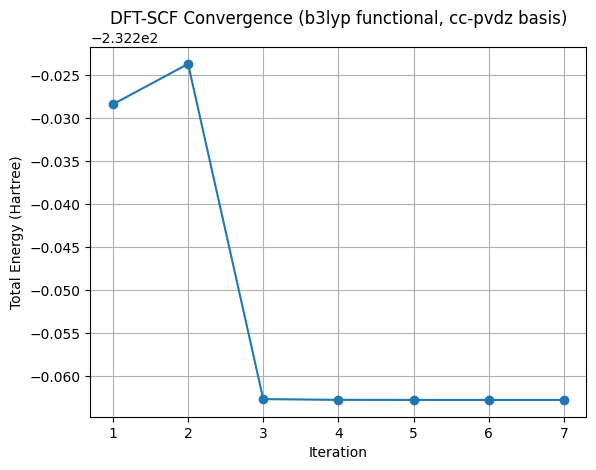

converged SCF energy = -230.721014924237


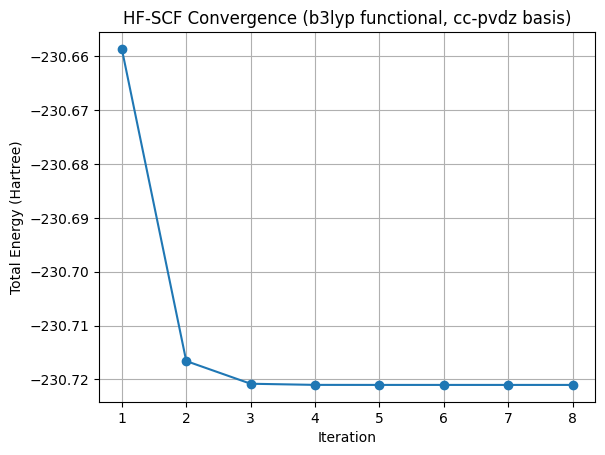

Total Energy for Benzene (C6H6): -230.72101492423735 Hartree

Calculating for Ammonia (NH3)...
converged SCF energy = -56.5342733560602


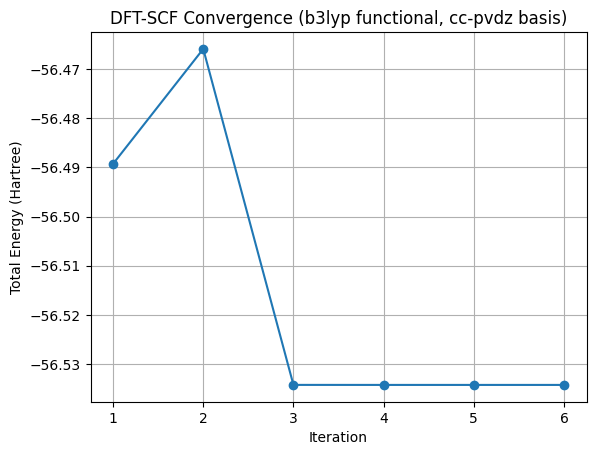

converged SCF energy = -56.1787421694387


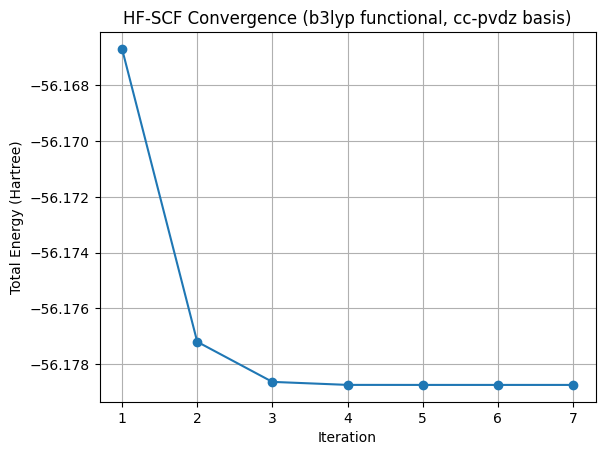

Total Energy for Ammonia (NH3): -56.178742169438706 Hartree

Water (H2O): -76.02679364497394 Hartree
Benzene (C6H6): -230.72101492423735 Hartree
Ammonia (NH3): -56.178742169438706 Hartree


In [54]:
# Calculate energies for all molecules
results = calculate_multiple_molecules(molecule_data)

# Display results
for molecule, energy in results.items():
    print(f"{molecule}: {energy} Hartree")